## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

## Packages

In [1]:
import numpy as np # math expressions
import matplotlib.pyplot as plt # plot

from numba import jit

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork') #grade3

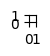

In [2]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

## Initialization

In [3]:
# Variables for the per capita growth rate
tmax = 2
time = np.linspace(1,tmax,tmax)

y1 = np.zeros(tmax)
#y1_t = np.zeros(tmax)
per_capita1 = np.zeros(tmax)

y01 = 5
y1[0] = y01 # initial condition

## Parameters

In [4]:
#C12, C21 > 0: coexistence (always coexistence)
r1=18
r2=13
a11=2.5
a12=0.8
a22=0.7
a21=0.6

C12 = (r1 - 1) / a12 - (1 / a22) * (r2 - 1)
C21 = (r2 - 1) / a21 - (1 / a11) * (r1 - 1)
print('C12='+str(C12)+',C21='+str(C21))

C12=4.107142857142858,C21=13.2


In [5]:
#C12, C21 < 0: extinction of N1 (eqpoint of coexistence is unstable: 235/11, 230/11)
r1=20
r2=18
a11=0.4
a12=0.5
a22=0.2
a21=0.6

C12 = (r1 - 1) / a12 - (1 / a22) * (r2 - 1)
C21 = (r2 - 1) / a21 - (1 / a11) * (r1 - 1)
print('C12='+str(C12)+',C21='+str(C21))

C12=-47.0,C21=-19.166666666666664


In [6]:
#C12C21 < 0: extinction of N1 (always extinction)
r1=16
r2=11
a11=0.7
a12=0.8
a22=0.5
a21=0.2

C12 = (r1 - 1) / a12 - (1 / a22) * (r2 - 1)
C21 = (r2 - 1) / a21 - (1 / a11) * (r1 - 1)
print('C12='+str(C12)+',C21='+str(C21))

C12=-1.25,C21=28.57142857142857


In [7]:
#C12 = C21 = 0: coexistence
r1=15
r2=11
a11=0.7
a12=0.14
a22=0.1
a21=0.5

C12 = (r1 - 1) / a12 - (1 / a22) * (r2 - 1)
C21 = (r2 - 1) / a21 - (1 / a11) * (r1 - 1)
print('C12='+str(C12)+',C21='+str(C21))

C12=-1.4210854715202004e-14,C21=0.0


In [8]:
#C12, C21 > 0: coexistence (always coexistence)
r1=14.72
r2=13
a11=2.5
a12=0.8
a22=0.7
a21=0.6

In [9]:
@jit(nopython=True)
def time_simul_reduced(y01, r1, r2, a12, a22):
    tmax = 2
    y1 = np.zeros(tmax)
    PGR1 = np.zeros(tmax)
    y1_relat = np.zeros(tmax)
    y1[0] = y01 # initial condition
    i, stopRun = 0, 0
    while stopRun == 0: # stops the simulation when the dynamics converges
        PGR1[i] = r1 / (1 + (r2 - 1) * a12 / a22)
        y1[i + 1] = y1[i] * PGR1[i]
        y1_relat[i] = y1[i] / (y1[i]+((r2-1)/a22))
        PGR1 = np.append(PGR1, PGR1[i])
        y1 = np.append(y1, y1[i])
        y1_relat = np.append(y1_relat, y1_relat[i])
        if np.abs(y1[i + 1] - y1[i]) < 1.0e-3:
            stopRun = 1
        i += 1
        if i > 1000:
            break
    return y1, y1_relat, PGR1

In [10]:
def reduced_CBHM(y01, r1, r2, a12, a22):
    y1, y1_relat, PGR1 = time_simul_reduced(y01, r1, r2, a12, a22)
    return y1, y1_relat, PGR1

In [11]:
y1, y1_relat, PGR1 = reduced_CBHM(y01, r1, r2, a12, a22)

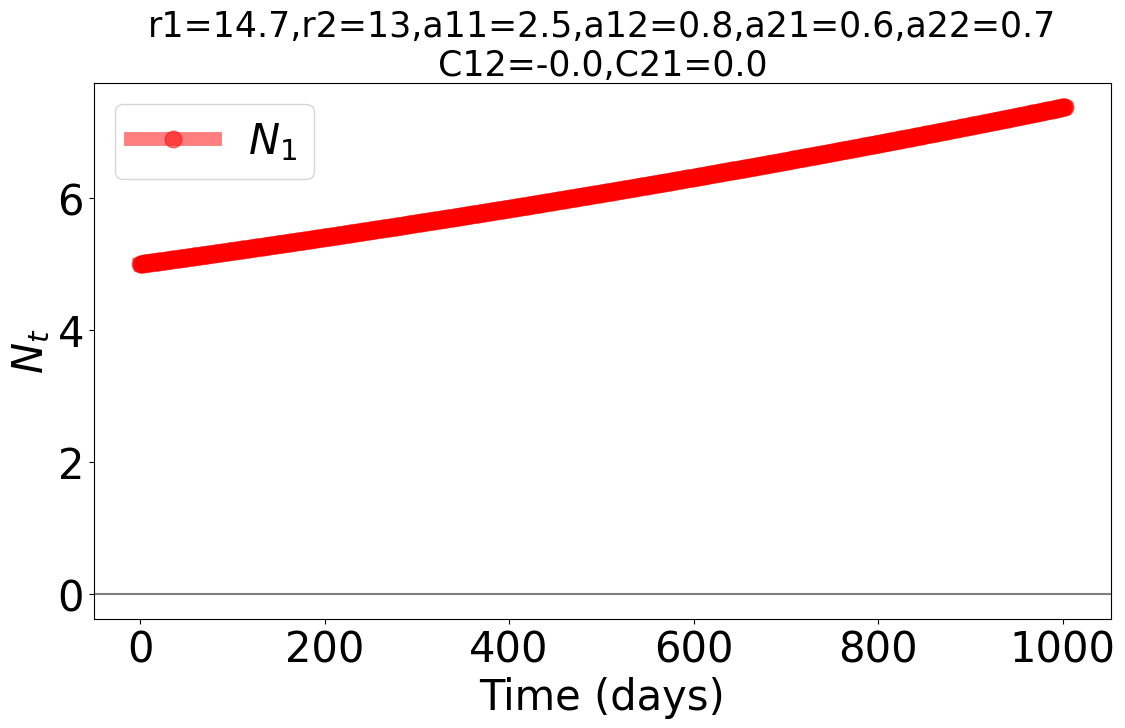

In [12]:
fig, (ax) = plt.subplots(1,figsize=(12, 8))
ax.plot(range(len(y1)), y1, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.set(xlabel='Time (days)', ylabel='$N_{t}$')
ax.axhline(y=0, color='grey', linestyle='-')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1))+str('\n')+'C12='+str(np.around(C12,2))+',C21='+str(np.around(C21,2)), wrap=True, fontsize=25) #
plt.tight_layout()
# plt.savefig('img/time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

In [13]:
# Same result:
growth1 = np.log(y1[1:-1])-np.log(y1[0:-2])
# growth2 = np.log(y2[1:-1])-np.log(y2[0:-2])

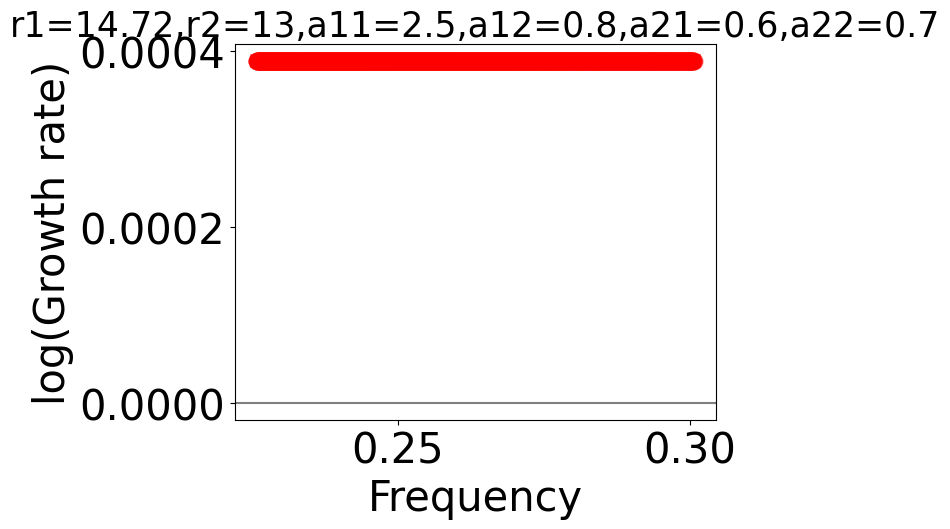

In [14]:
fig, (ax) = plt.subplots(1,figsize=(8, 6))
ax.plot(y1_relat[:-2], growth1, alpha=0.5,marker="o", linewidth=10, markersize=12, color="r")
# ax.plot(y_rel2[:-2], growth2, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b")
ax.set(xlabel='Frequency', ylabel='log(Growth rate)')
ax.axhline(y=0, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
##plt.savefig('img/yenni_time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

In [15]:
# Second set of parameters
r2_b=13
a22_b=1.0

# Get y1, y1_relat, and PGR1 for the second set of parameters
y1_b, y1_relat_b, PGR1_b = reduced_CBHM(y01, r1, r2_b, a12, a22_b)

In [16]:
growth1_b = np.log(y1_b[1:-1]) - np.log(y1_b[0:-2])

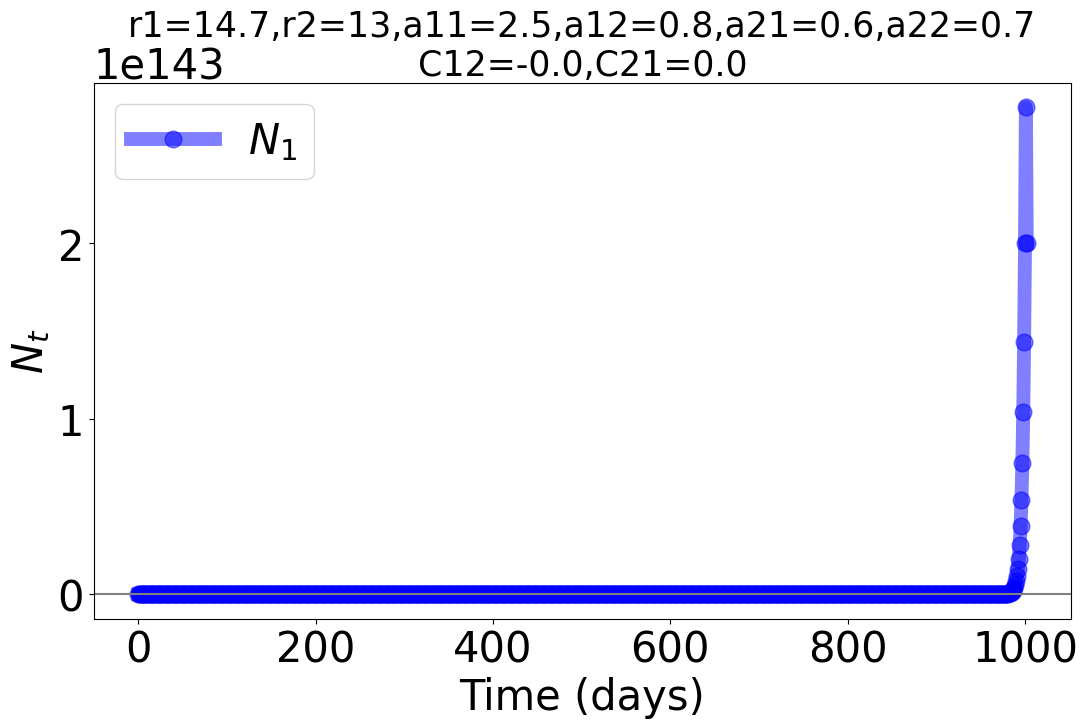

In [17]:
fig, (ax) = plt.subplots(1,figsize=(12, 8))
ax.plot(range(len(y1_b)), y1_b, alpha=0.5,marker="o", linewidth=10, markersize=12, color="b", label='$N_{1}$')
ax.set(xlabel='Time (days)', ylabel='$N_{t}$')
ax.axhline(y=0, color='grey', linestyle='-')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(np.around(r1,1))+',r2='+str(np.around(r2,1))+',a11='+str(np.around(a11,1))+',a12='+str(np.around(a12,1))+',a21='+str(np.around(a21,1))+',a22='+str(np.around(a22,1))+str('\n')+'C12='+str(np.around(C12,2))+',C21='+str(np.around(C21,2)), wrap=True, fontsize=25) #
plt.tight_layout()
# plt.savefig('img/time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

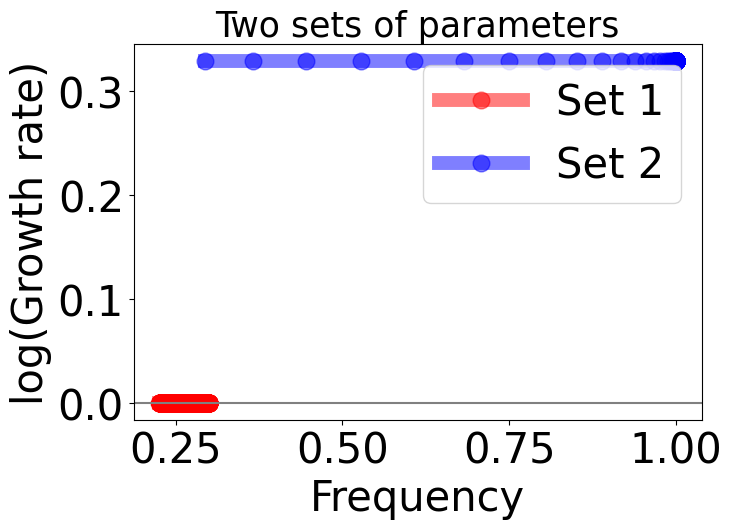

In [18]:
fig, (ax) = plt.subplots(1, figsize=(8, 6))
ax.plot(y1_relat[:-2], growth1, alpha=0.5, marker="o", linewidth=10, markersize=12, color="r", label='Set 1')
ax.plot(y1_relat_b[:-2], growth1_b, alpha=0.5, marker="o", linewidth=10, markersize=12, color="b", label='Set 2')
ax.set(xlabel='Frequency', ylabel='log(Growth rate)')
ax.axhline(y=0, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})
ax.legend()
ax.set_title('Two sets of parameters', fontsize=25)
plt.tight_layout()
plt.show()